<a href="https://colab.research.google.com/github/Al-Amin-Saheed-Babatunde/GPM-500-Coastal-Flood-Project-/blob/main/gpm_500_fvm_ilaje_ondo_nigeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
flood_data = pd.read_excel("/content/drive/MyDrive/Al-Amin/Data_Flood_FVM_Ilaje.xlsx")
flood_data.head()

,elevation,rainfall,twi,spi,slope,lulc_rec,pl_curva,NDVI,NEAR_FID,NEAR_DIST,x,y,Geo,flood_d
0,3,2052.41,14.6435,-6.90609,0.052770,1,10830800,0.159256,46,0.004040,4.877543,6.011262,1,0
1,3,2052.41,0.0000,0.00000,0.000000,2,8176700,0.233817,393,0.005260,4.865627,6.019285,1,0
2,2,2052.41,15.8368,-6.90653,0.013203,1,-158925,0.115628,400,0.007192,4.877543,6.019285,1,0
3,2,2022.38,17.4455,1.10011,0.028916,1,-7861510,0.138735,386,0.000651,4.853711,6.035331,1,0
4,2,2045.37,19.2159,4.14459,0.126040,3,-19102500,0.267776,400,0.001408,4.877543,6.035331,1,0


In [ ]:
# Checking our data for missing data
flood_data.isna().sum()

elevation    0
rainfall     0
twi          0
spi          0
slope        0
lulc_rec     0
pl_curva     0
NDVI         0
NEAR_FID     0
NEAR_DIST    0
x            0
y            0
Geo          0
flood_d      0
dtype: int64

##No missing data was found in our data

In [ ]:
flood_data.shape

(589, 14)

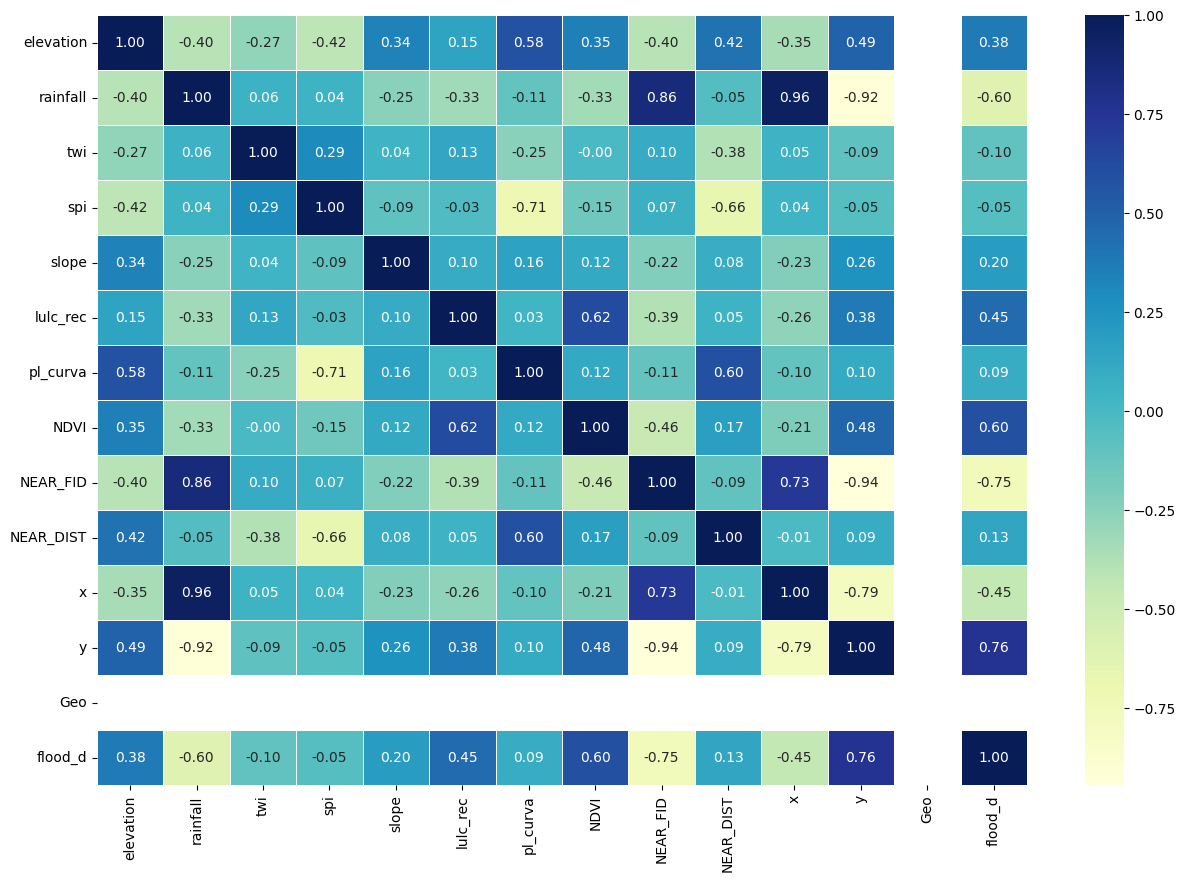

In [ ]:
# Let make our correlation matrix a little visual
corr_matrix = flood_data.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap="YlGnBu");

In [ ]:
# Shuffle the rows randomly
flood_data = flood_data.sample(frac=1, random_state=42)  # Set random_state for reproducibility

In [ ]:
xx = flood_data["x"]
flood_data.drop("x", axis = 1, inplace = True)

yy= flood_data["y"]
flood_data.drop("y", axis = 1, inplace = True)

geo  = flood_data["Geo"]
flood_data.drop("Geo", axis = 1, inplace = True)

In [ ]:
flood_data.head(40)

,elevation,rainfall,twi,spi,slope,lulc_rec,pl_curva,NDVI,NEAR_FID,NEAR_DIST,flood_d
521,5,1939.28,19.7838,0.697570,0.232535,2,-29393700,0.138089,106,2.767616e-03,1
284,5,1851.50,17.1026,3.180350,0.071813,2,-16630800,0.194373,159,2.531308e-12,1
513,4,1947.88,22.5558,5.226800,0.044767,2,-30087200,0.340365,114,4.647452e-04,1
331,18,1884.79,12.1427,-6.905580,0.067577,2,90863900,0.341215,96,8.012417e-03,1
210,7,1921.49,13.0216,0.696906,0.129457,1,-1549500,0.060180,281,5.190421e-03,0
90,0,2045.37,17.7286,2.486380,0.029863,2,-31662300,0.136514,396,2.101960e-03,0
299,13,1892.56,12.6049,-6.905830,0.052771,2,24212700,0.317234,194,9.757435e-03,1
181,9,1991.69,14.4461,-6.904960,0.046236,2,1222010,0.287613,297,4.818857e-03,0
545,8,1906.24,19.8864,4.746090,0.008571,2,-1094890,0.214791,85,7.794654e-12,1
137,4,1884.46,14.4496,-6.905950,0.046076,2,1275470,0.328818,205,9.997198e-04,0


##Training our model on the parameters using a Random Forest Classifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X = flood_data.drop("flood_d", axis = 1)
y = flood_data["flood_d"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the model using evalution functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 98.31%
Precision: 0.9852941176470589
Recall: 0.9852941176470589
F1: 0.9852941176470589


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]}

np.random.seed(42)

# Split into X & y

X  = flood_data.drop("flood_d", axis = 1)
y = flood_data["flood_d"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs =1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                           param_distributions = grid,
                           n_iter = 10, #number of models to try
                            cv = 5,
                            verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_featu

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   2.6s


In [ ]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [ ]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='weighted')
    recall = recall_score(y_true, y_preds, average='weighted')
    f1 = f1_score(y_true, y_preds, average='weighted')

    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }

    print(f"Acc: {accuracy * 100:.2f}%")
    print(f" Precision: {precision:.2f}")
    print(f" Recall: {recall:.2f}")
    print(f" F1 score: {f1:.2f}")

    return metric_dict


In [ ]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 98.31%
 Precision: 0.98
 Recall: 0.98
 F1 score: 0.98


# HyperParameter Tunning using the GridSearchCv

In [ ]:
## Setting up the hyperparameters for the GridSearchCv
grid = {"n_estimators": [100, 200, 500],
        "max_depth": [None],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [6],
        "min_samples_leaf": [1,2]}

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y

X  = flood_data.drop("flood_d", axis = 1)
y = flood_data["flood_d"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs =1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                      param_grid = grid,
                      cv = 5,
                      verbose = 2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None,

In [ ]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [ ]:
gs_y_preds = gs_clf.predict(X_test)

# gs_metrics = evaluate_preds(y_test, gs_y_preds)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 98.31%
 Precision: 0.98
 Recall: 0.98
 F1 score: 0.98


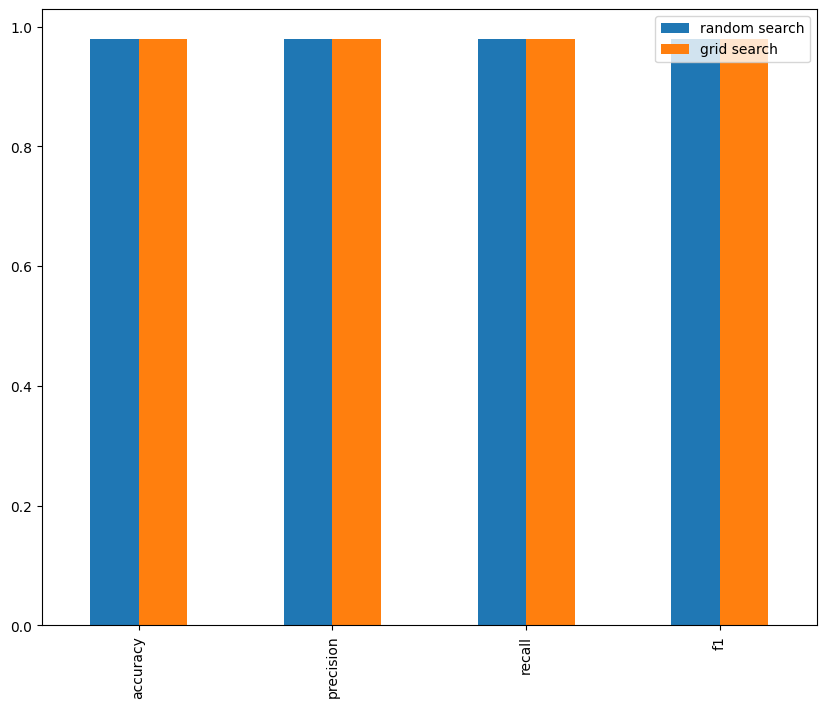

In [ ]:
compare_metrics = pd.DataFrame({"random search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

# ROC CURVE FOR THE MODEL

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rs_y_preds)

# Check the false positive rates
fpr

array([0.  , 0.02, 1.  ])

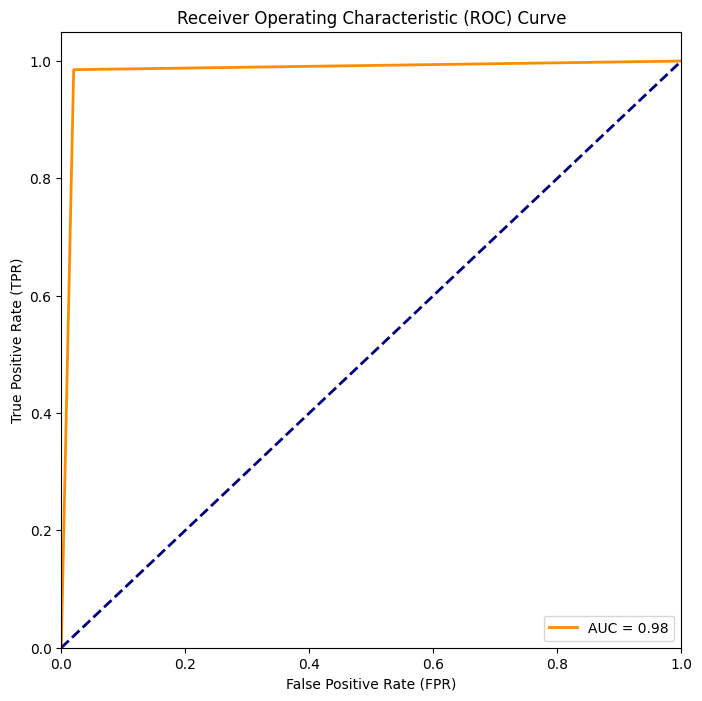

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, gs_y_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

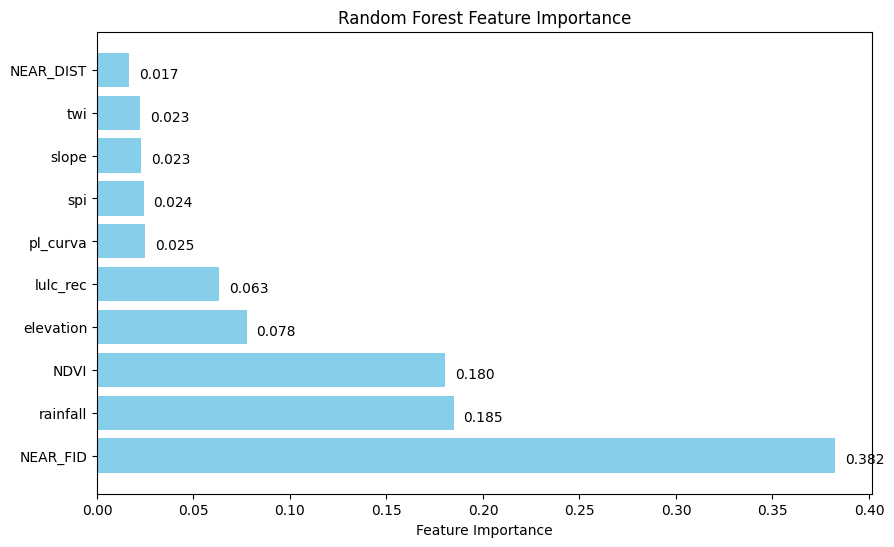

In [ ]:
# Extract and print feature importances
gs_class = gs_clf
feature_importances = clf.feature_importances_
parameter_names = list(X.columns)

# Sort features based on importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [parameter_names[i] for i in sorted_indices]
sorted_importances = [feature_importances[i] for i in sorted_indices]

# Plot feature importance with parameter names and scores
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

# Annotate each bar with its importance score
for bar, importance in zip(bars, sorted_importances):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2 - 0.1,
             f'{importance:.3f}', va='center')

plt.show()

# Training our Model on the Parameters Using the XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X  = flood_data.drop("flood_d", axis = 1)
y = flood_data["flood_d"]

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define ROC AUC as the scoring metric for Grid Search
scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorer, n_jobs=-1)
grid_search.fit(X_train_standardized, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions on the standardized test set
y_prob = best_model.predict_proba(X_test_standardized)[:, 1]

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'ROC AUC: {roc_auc}')

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.9}
ROC AUC: 0.9961764705882352


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = best_model.predict(X_test_standardized)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute precision
precision = precision_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred)

# Compute F1 score
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Best Parameters: {grid_search.best_params_}')
print(f'ROC AUC: {roc_auc}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.9}
ROC AUC: 0.9961764705882352
Accuracy: 0.9745762711864406
Precision: 0.9710144927536232
Recall: 0.9852941176470589
F1 Score: 0.9781021897810219


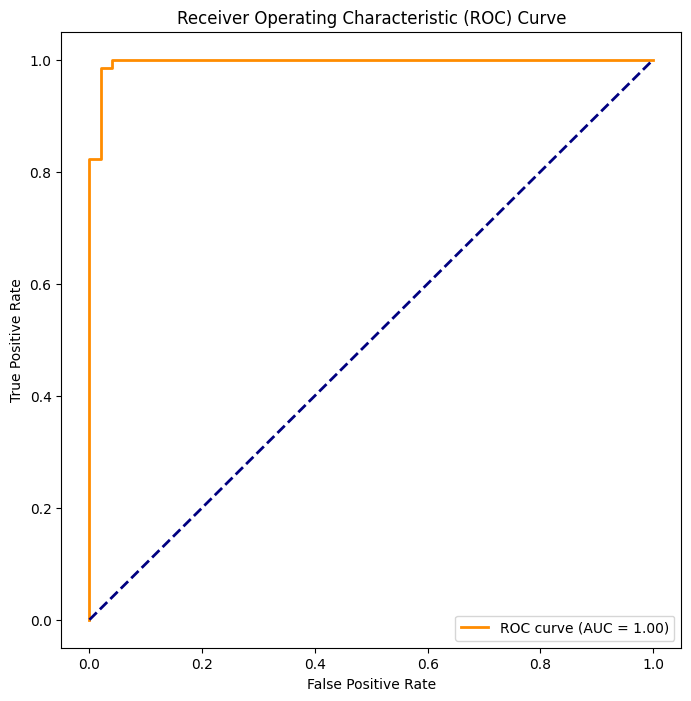

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

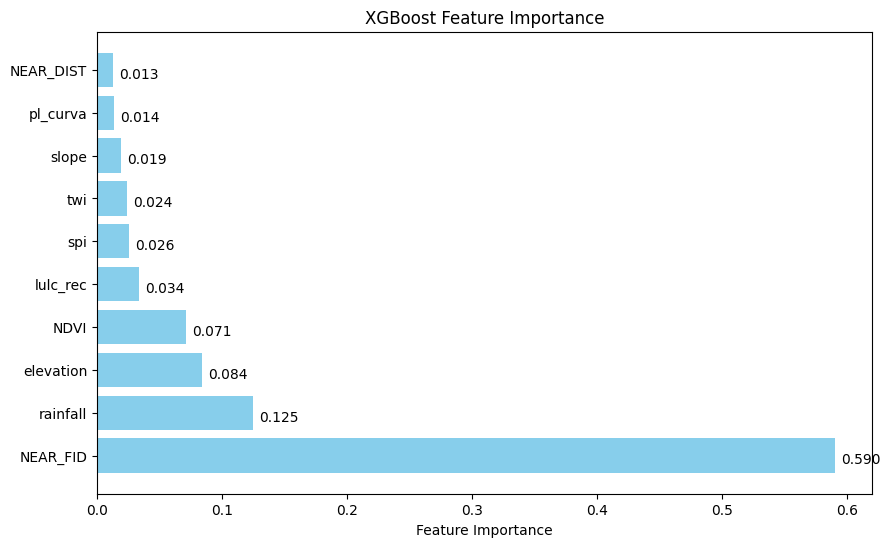

In [ ]:
# Extract and print feature importances
feature_importances = best_model.feature_importances_
parameter_names = list(X.columns)

# Sort features based on importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [parameter_names[i] for i in sorted_indices]
sorted_importances = [feature_importances[i] for i in sorted_indices]

# Plot feature importance with parameter names and scores
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')

# Annotate each bar with its importance score
for bar, importance in zip(bars, sorted_importances):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2 - 0.1,
             f'{importance:.3f}', va='center')

plt.show()

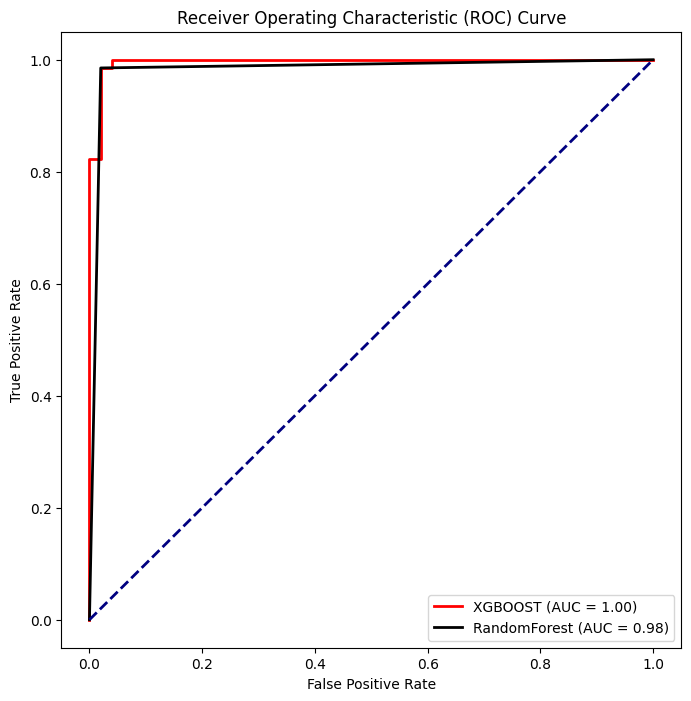

In [ ]:
# Predict probabilities for positive class
y_prob1 = best_model.predict_proba(X_test_standardized)[:, 1]
y_prob2 = gs_y_preds

# Calculate ROC curve values
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
fpr2, tpr2, _ = roc_curve(y_test, y_prob2)

# Calculate AUC (Area Under the Curve)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curves
plt.figure(figsize=(8, 8))

plt.plot(fpr1, tpr1, color='red', lw=2, label=f'XGBOOST (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='black', lw=2, label=f'RandomForest (AUC = {roc_auc2:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Validation_data =  pd.read_excel("/content/drive/MyDrive/Stephen/Validation Data.xlsx")
Validation_data.head()

,elevation,rainfall,twi,spi,slope,lulc_rec,pl_curva,NDVI,NEAR_FID,NEAR_DIST,x,y,Geo,flood_d
0,13,1939.52,14.3982,-6.90611,0.048504,1,24801200.0,0.090118,244,0.009880,4.722636,6.227887,1,0
1,6,1939.52,14.4593,1.09995,0.290855,3,-40465000.0,0.327745,244,0.003523,4.734552,6.227887,1,0
2,3,1950.89,22.0448,2.99678,0.399468,2,-62612200.0,0.259465,270,0.000980,4.758384,6.227887,1,0
3,6,1950.89,17.7622,2.71120,0.117294,3,-34348100.0,0.267101,270,0.001683,4.770300,6.227887,1,0
4,5,1963.41,15.3158,3.49807,0.303060,2,-46864500.0,0.329152,248,0.001404,4.794131,6.227887,1,0


In [ ]:
# Shuffle the rows randomly
Validation_data = Validation_data.sample(frac=1, random_state=42)  # Set random_state for reproducibility

## Dropping x, y and flood_d data

In [ ]:
xxx = Validation_data["x"]
Validation_data.drop("x", axis = 1, inplace = True)

yyy= Validation_data["y"]
Validation_data.drop("y", axis = 1, inplace = True)

Real_Flood= Validation_data["flood_d"]
Validation_data.drop("flood_d", axis = 1, inplace = True)

Geo= Validation_data["Geo"]
Validation_data.drop("Geo", axis = 1, inplace = True)

In [ ]:
Validation_data.head()

,elevation,rainfall,twi,spi,slope,lulc_rec,pl_curva,NDVI,NEAR_FID,NEAR_DIST
635,16,1926.43,13.2411,-6.90350,0.186320,2,39730600.0,0.345355,185,0.011019
220,4,1947.88,18.6393,2.83449,0.070483,2,-36616100.0,0.281857,121,0.001211
593,16,1939.52,12.7021,-6.90223,0.259284,1,88354400.0,0.119661,238,0.005296
429,6,2015.70,14.7207,-6.90614,0.042705,2,10783200.0,0.200033,366,0.005599
72,12,1868.41,13.2856,-6.90585,0.051965,2,45507500.0,0.289942,146,0.006612


# PREDICTION OF FLOOD USING THE TRAINED MODEL FROM RANDOM FOREST. OUR MODEL NAME IS **"gs_clf"**

In [ ]:
# Prediction of flood from parameters using Random Forest Classifier
Flood_prediction_RF = clf.predict(Validation_data)

# PREDICTION OF FLOOD USING THE TRAINED MODEL FROM XGBOOST. OUR MODEL NAME IS **"best_model"**

In [ ]:
# Prediction of flood from parameters using XGBOOST CLASSIFIER
Flood_prediction_XGB = best_model.predict(Validation_data)

##### ORGANIZING ALL OUR DATA BACK INTO THE SAME FILE AND VIEW OUR MODEL(S) PRDICTION (X, Y, REAL_FLOOD, PREDICT FLOOD FROM RANDOM FOREST AND PREDICTED FLOOD FROM XGBOOST.

In [ ]:
Validation_data["x"] = xxx
Validation_data["y"] = yyy
Validation_data["Real_Flood_data"] = Real_Flood
Validation_data["RF_Predicted_Flood"] = Flood_prediction_RF
Validation_data["XGBoost_Predicted_Flood"] = Flood_prediction_XGB

In [ ]:
Validation_data.to_csv("/content/drive/MyDrive/Al-Amin/Prediction_RF-XGBoost_FVM_Ilaje.csv", index = False)